In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality.csv to winequality.csv


In [ ]:
data = pd.read_csv("winequality.csv")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,11.2,0.23,0.55,1.7,0.070,15.0,60.0,0.9800,?,0.50,9.0,6


In [ ]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1598,6.2,0.600,0.08,2,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1599,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1600,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1601,5.9,0.645,0.12,2,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1602,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
data.shape

(1603, 12)

In [ ]:
data.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid residual sugar  chlorides  \
0               7.4             0.700         0.00            1.9      0.076   
1               7.8             0.880         0.00            2.6      0.098   
2               7.8             0.760         0.04            2.3      0.092   
3              11.2             0.280         0.56            1.9      0.075   
4              11.2             0.230         0.55            1.7      0.070   
...             ...               ...          ...            ...        ...   
1598            6.2             0.600         0.08              2      0.090   
1599            5.9             0.550         0.10            2.2      0.062   
1600            6.3             0.510         0.13            2.3      0.076   
1601            5.9             0.645         0.12              2      0.075   
1602            6.0             0.310         0.47            3.6      0.067   

     

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1603 non-null   float64
 1   volatile acidity      1603 non-null   float64
 2   citric acid           1603 non-null   float64
 3   residual sugar        1603 non-null   object 
 4   chlorides             1602 non-null   float64
 5   free sulfur dioxide   1603 non-null   float64
 6   total sulfur dioxide  1603 non-null   float64
 7   density               1603 non-null   float64
 8   pH                    1603 non-null   object 
 9   sulphates             1603 non-null   float64
 10  alcohol               1603 non-null   float64
 11  quality               1603 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 150.4+ KB


In [ ]:
data['residual sugar'] = pd.to_numeric(data['residual sugar'], errors='coerce')
data['pH'] = pd.to_numeric(data['pH'], errors='coerce')

In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          1
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
median_value = data['residual sugar'].median()
data['residual sugar'].fillna(median_value, inplace=True)
median_value = data['chlorides'].median()
data['chlorides'].fillna(median_value, inplace=True)
mean_value = data['pH'].mean()
data['pH'].fillna(mean_value, inplace=True)


In [ ]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
data['quality'].value_counts()


5    682
6    639
7    199
4     55
8     18
3     10
Name: quality, dtype: int64

In [ ]:
threshold_value = 5
data['Target'] = (data['quality'] > threshold_value).astype(int)
data = data.drop('quality', axis=1)

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.510000,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.200000,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.260000,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.160000,0.58,9.8,1
4,11.2,0.23,0.55,1.7,0.070,15.0,60.0,0.9800,3.311142,0.50,9.0,1


In [ ]:
data['Target'].value_counts()

1    856
0    747
Name: Target, dtype: int64

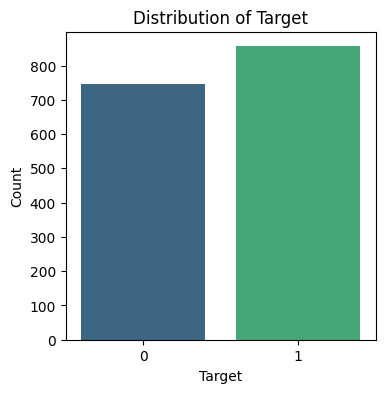

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Target', data=data, palette='viridis')
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**CLASSIFICATION**

In [ ]:
#splitting data into train test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = data.drop(['Target'], axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((1202, 11), (401, 11))

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

## Initialise the logistc regression model with:
##   C (regularization parameter) = 1000
lr = LogisticRegression(random_state = 0 )
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 71.3216957605985
Confusion Matrix:
[[123  69]
 [ 46 163]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       192
           1       0.70      0.78      0.74       209

    accuracy                           0.71       401
   macro avg       0.72      0.71      0.71       401
weighted avg       0.71      0.71      0.71       401



SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear',random_state = 0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred= svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 72.81795511221945
Confusion Matrix:
[[133  59]
 [ 50 159]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       192
           1       0.73      0.76      0.74       209

    accuracy                           0.73       401
   macro avg       0.73      0.73      0.73       401
weighted avg       0.73      0.73      0.73       401



DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy'
                             , max_depth = 3
                             , random_state = 0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 67.08229426433915
Confusion Matrix:
[[ 85 107]
 [ 25 184]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.44      0.56       192
           1       0.63      0.88      0.74       209

    accuracy                           0.67       401
   macro avg       0.70      0.66      0.65       401
weighted avg       0.70      0.67      0.65       401



NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 60.84788029925187
Confusion Matrix:
[[ 88 104]
 [ 53 156]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.46      0.53       192
           1       0.60      0.75      0.67       209

    accuracy                           0.61       401
   macro avg       0.61      0.60      0.60       401
weighted avg       0.61      0.61      0.60       401



KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_value = 3
model = KNeighborsClassifier(n_neighbors=k_value)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 66.58354114713218
Confusion Matrix:
[[123  69]
 [ 65 144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       192
           1       0.68      0.69      0.68       209

    accuracy                           0.67       401
   macro avg       0.67      0.66      0.66       401
weighted avg       0.67      0.67      0.67       401



RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 79.80049875311721
Confusion Matrix:
[[141  51]
 [ 30 179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.78       192
           1       0.78      0.86      0.82       209

    accuracy                           0.80       401
   macro avg       0.80      0.80      0.80       401
weighted avg       0.80      0.80      0.80       401



In [ ]:
#Lets check the accuracy of our model
import numpy as np
prediction = model.predict((np.array([[ 7.4, #fixed acidity
                                        0.7, #'volatile acidity',
                                        0, #'citric acid',
                                        1.9, #'residual sugar',
                                        0.076, #'chlorides',
                                        11, #'free sulfur dioxide',
                                        34, #'total sulfur dioxide',
                                        0.9978, #'density',
                                        3.51, #'pH',
                                        0.56, #'sulphates',
                                        9.4]])))#for alcohol
print("The suggested quality for given features is:",prediction)

The suggested quality for given features is: [0]


Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

In [ ]:
adaboost_classifier.fit(X_train, y_train)
y_pred = adaboost_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7356608478802993
Confusion Matrix:
[[125  67]
 [ 39 170]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       192
           1       0.72      0.81      0.76       209

    accuracy                           0.74       401
   macro avg       0.74      0.73      0.73       401
weighted avg       0.74      0.74      0.73       401



XGBoost Class

In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)


In [ ]:
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.7805486284289277
Confusion Matrix:
[[139  53]
 [ 35 174]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       192
           1       0.77      0.83      0.80       209

    accuracy                           0.78       401
   macro avg       0.78      0.78      0.78       401
weighted avg       0.78      0.78      0.78       401



Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.7506234413965087
Confusion Matrix:
[[130  62]
 [ 38 171]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       192
           1       0.73      0.82      0.77       209

    accuracy                           0.75       401
   macro avg       0.75      0.75      0.75       401
weighted avg       0.75      0.75      0.75       401



Neaural Network

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer=Adagrad(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)


Epoch 1/1000
26/26 [==============================] - 0s 11ms/step - loss: 0.3215 - accuracy: 0.8582 - val_loss: 7.8984 - val_accuracy: 0.7703
Epoch 2/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3216 - accuracy: 0.8582 - val_loss: 7.9040 - val_accuracy: 0.7703
Epoch 3/1000
26/26 [==============================] - 0s 6ms/step - loss: 0.3213 - accuracy: 0.8594 - val_loss: 7.9120 - val_accuracy: 0.7703
Epoch 4/1000
26/26 [==============================] - 0s 10ms/step - loss: 0.3221 - accuracy: 0.8522 - val_loss: 7.7751 - val_accuracy: 0.7703
Epoch 5/1000
26/26 [==============================] - 0s 6ms/step - loss: 0.3218 - accuracy: 0.8546 - val_loss: 7.8390 - val_accuracy: 0.7656
Epoch 6/1000
26/26 [==============================] - 0s 6ms/step - loss: 0.3217 - accuracy: 0.8546 - val_loss: 7.8547 - val_accuracy: 0.7703
Epoch 7/1000
26/26 [==============================] - 0s 6ms/step - loss: 0.3214 - accuracy: 0.8570 - val_loss: 7.8407 - val_accuracy: 0.7656
Epoc

In [ ]:
y_pred = (model.predict(X_test)> 0.5).astype(int)



18/18 [==============================] - 0s 2ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
class_report = classification_report(y_test,y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 75.62%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       270
           1       0.76      0.78      0.77       292

    accuracy                           0.76       562
   macro avg       0.76      0.76      0.76       562
weighted avg       0.76      0.76      0.76       562



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[198  72]
 [ 65 227]]
